<a href="https://colab.research.google.com/github/Rushikesh419/Machine-learning/blob/main/SVM_visualization_and_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df=pd.read_csv('/content/mouse_viral_study.csv')

In [28]:
df

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
...,...,...,...
395,2.884122,3.271748,1
396,7.290855,9.488672,0
397,7.895325,8.272529,0
398,2.690592,2.674979,1


<Axes: xlabel='Med_1_mL', ylabel='Med_2_mL'>

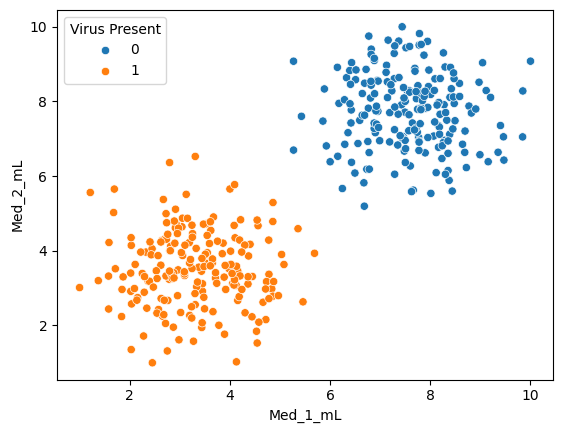

In [29]:
sns.scatterplot(data=df,x='Med_1_mL',y='Med_2_mL',hue='Virus Present')

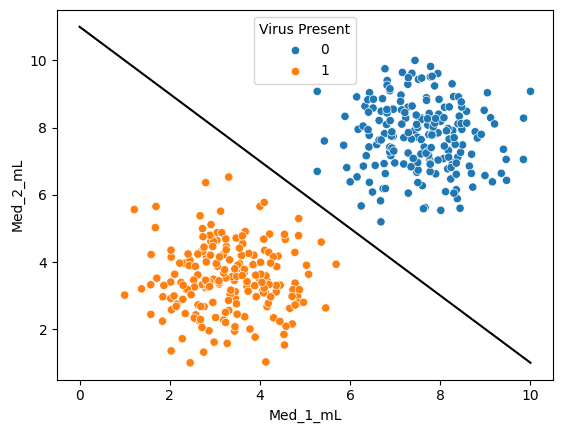

In [30]:
# manual hyperplane
sns.scatterplot(data=df,x='Med_1_mL',y='Med_2_mL',hue='Virus Present')
x=np.linspace(0,10,100)
m=-1
b=11
y=m*x + b
plt.plot(x,y,'black')

In [31]:
def plot_svm_boundary(model,X,y):

    X = X.values
    y = y.values

    # Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')


    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

In [32]:
from sklearn.svm import SVC

In [33]:
# help(SVC)

In [34]:
# we are only visualzing for now

In [35]:
y=df['Virus Present']
X=df.drop('Virus Present',axis=1)

In [36]:
model=SVC(kernel='linear',C=1000)

In [37]:
model.fit(X,y)

SVC(C=1000, kernel='linear')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


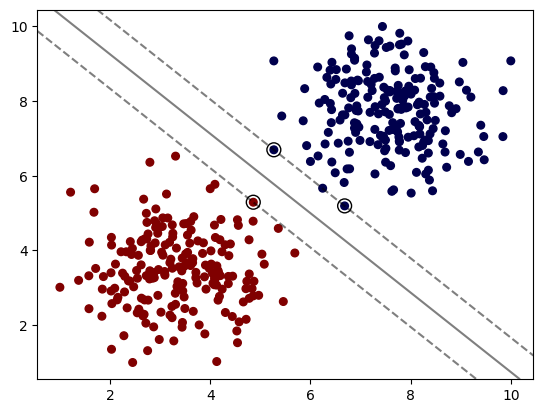

In [38]:
plot_svm_boundary(model,X,y)

In [41]:
model=SVC(kernel='linear',C=0.05)

In [42]:
model.fit(X,y)

SVC(C=0.05, kernel='linear')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


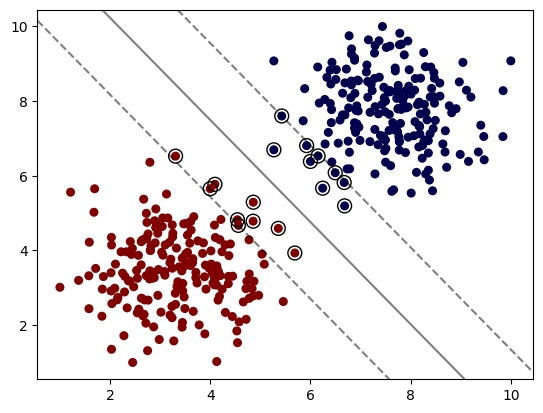

In [43]:
plot_svm_boundary(model,X,y)

In [45]:
model=SVC(kernel='rbf',C=1)

In [46]:
model.fit(X,y)

SVC(C=1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


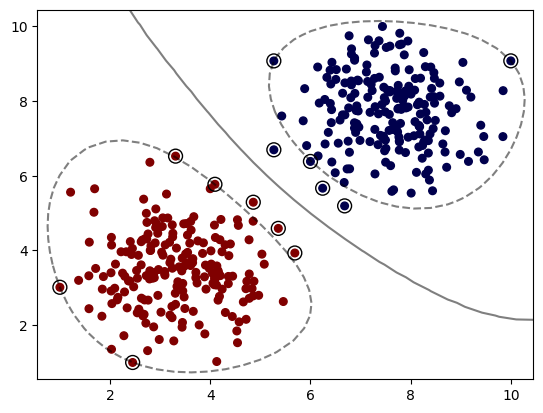

In [47]:
plot_svm_boundary(model,X,y)

In [59]:
model=SVC(kernel='rbf',C=1,gamma='scale') '(auto,scale ) or any float value'
# if gamma is big then it overfits

In [60]:
model.fit(X,y)

SVC(C=1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


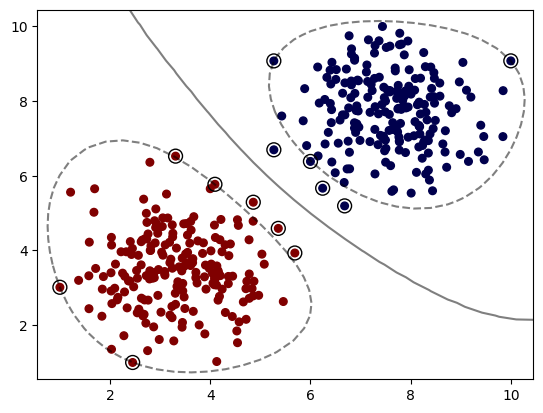

In [61]:
plot_svm_boundary(model,X,y)

In [63]:
model=SVC(kernel='sigmoid')

In [64]:
model.fit(X,y)

SVC(kernel='sigmoid')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


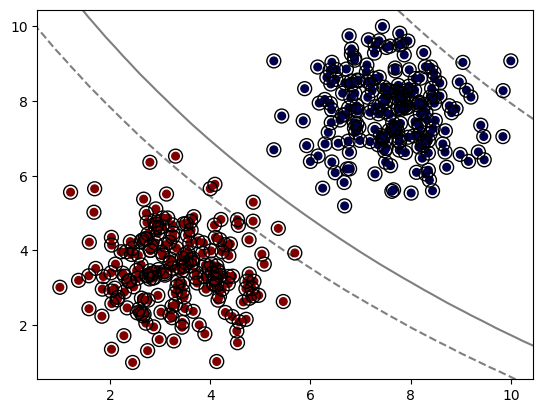

In [65]:
plot_svm_boundary(model,X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


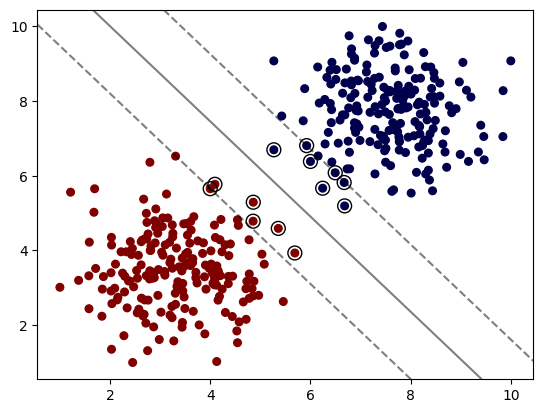

In [66]:
model=SVC(kernel='poly',C=1,degree=1)
model.fit(X,y)
plot_svm_boundary(model,X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


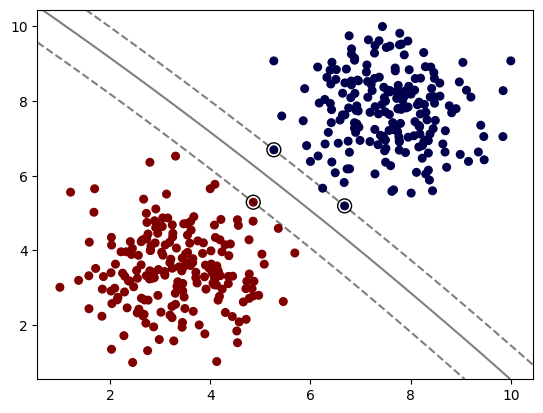

In [72]:
model=SVC(kernel='poly',C=0.05,degree=3)
model.fit(X,y)
plot_svm_boundary(model,X,y)

In [ ]:
# gridsearch

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
svm=SVC()

In [79]:
param_grid={'C':[0.01,0.1,1],'kernel':['linear','rbf']}

In [80]:
grid=GridSearchCV(svm,param_grid)

In [81]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [82]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}